## Visualization of the Student Data

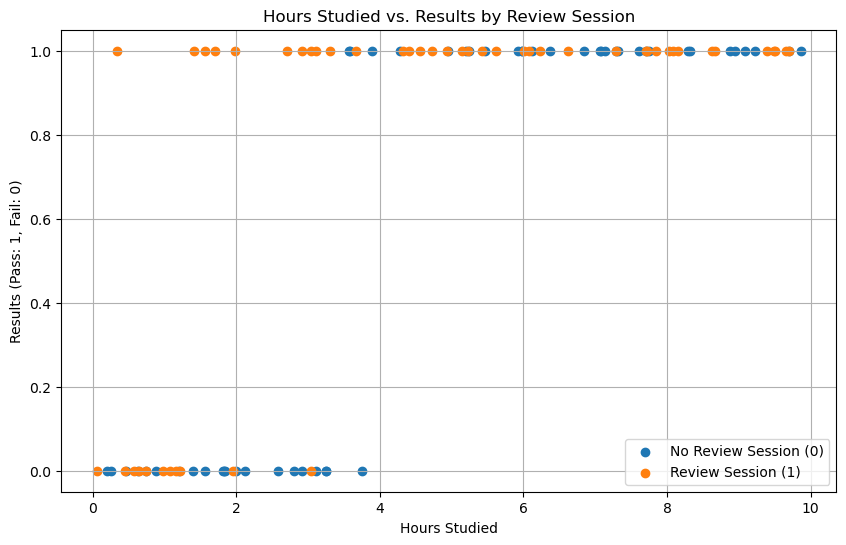

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = "/Users/BenAbril/Desktop/IS 428/student_data.csv"

# Load the dataset
data = pd.read_csv(file_path)

# Separate the data into two groups based on Review_Session (0 or 1)
review_session_0 = data[data["Review_Session"] == 0]
review_session_1 = data[data["Review_Session"] == 1]

# Plot a scatter plot to visualize Hours Studied vs. Results
plt.figure(figsize=(10, 6))
plt.scatter(review_session_0["Hours_Studied"], review_session_0["Results"], label="No Review Session (0)")
plt.scatter(review_session_1["Hours_Studied"], review_session_1["Results"], label="Review Session (1)")

plt.xlabel("Hours Studied")
plt.ylabel("Results (Pass: 1, Fail: 0)")
plt.title("Hours Studied vs. Results by Review Session")
plt.legend()
plt.grid(True)
plt.show()


## Fit a Model Using Logistic Regression

In [5]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset
data = pd.read_csv(file_path)

# Define the features (X) and target variable (y)
X = data[["Hours_Studied", "Review_Session"]]
y = data["Results"]

# Initialize and fit the logistic regression model on the entire dataset
model = LogisticRegression()
model.fit(X, y)

# Make predictions on the same dataset
y_pred = model.predict(X)

# Evaluate the model
accuracy = accuracy_score(y, y_pred)
confusion = confusion_matrix(y, y_pred)
classification_rep = classification_report(y, y_pred)

# Print the results
print("Logistic Regression Model Results:")
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(confusion)
print("Classification Report:")
print(classification_rep)


Logistic Regression Model Results:
Accuracy: 0.93
Confusion Matrix:
[[30  2]
 [ 5 63]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.94      0.90        32
           1       0.97      0.93      0.95        68

    accuracy                           0.93       100
   macro avg       0.91      0.93      0.92       100
weighted avg       0.93      0.93      0.93       100



## Output Model Coefficients and Performance Metrics

Model Coefficients:
Coefficient for Hours_studied: 1.3649921479140226
Coefficient for Review_Session: 1.877337556034606
Intercept: -4.611824619837931

Accuracy: 0.93
ROC AUC: 0.9761029411764706


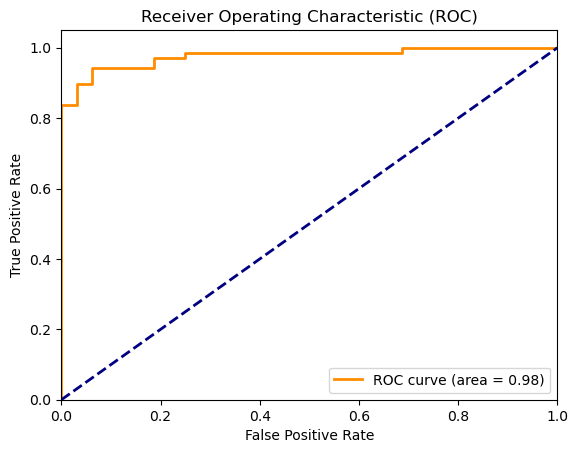

In [7]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv(file_path)

# Define the features (X) and target variable (y)
X = data[["Hours_Studied", "Review_Session"]]
y = data["Results"]

# Initialize and fit the logistic regression model
model = LogisticRegression()
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)
y_prob = model.predict_proba(X)[:, 1]

# Output model coefficients
coefficients = model.coef_
intercept = model.intercept_

print("Model Coefficients:")
print("Coefficient for Hours_studied:", coefficients[0][0])
print("Coefficient for Review_Session:", coefficients[0][1])
print("Intercept:", intercept[0])

# Calculate accuracy
accuracy = accuracy_score(y, y_pred)
print("\nAccuracy:", accuracy)

# Calculate ROC AUC
roc_auc = roc_auc_score(y, y_prob)
print("ROC AUC:", roc_auc)

# Plot ROC curve
fpr, tpr, _ = roc_curve(y, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()


## Fit a SVM Model Using a Linear Kernel (using train/test split)

In [9]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset
data = pd.read_csv(file_path)

# Define the features (X) and target variable (y)
X = data[["Hours_Studied", "Review_Session"]]
y = data["Results"]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the SVM model with a linear kernel
model = SVC(kernel='linear')
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print("SVM Model with Linear Kernel Results:")
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(confusion)
print("Classification Report:")
print(classification_rep)


SVM Model with Linear Kernel Results:
Accuracy: 0.85
Confusion Matrix:
[[ 5  1]
 [ 2 12]]
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.83      0.77         6
           1       0.92      0.86      0.89        14

    accuracy                           0.85        20
   macro avg       0.82      0.85      0.83        20
weighted avg       0.86      0.85      0.85        20



## Fit a SVM Model Using an Linear Kernel (train and test the same dataset)

In [11]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset
data = pd.read_csv(file_path)

# Define the features (X) and target variable (y)
X = data[["Hours_Studied", "Review_Session"]]
y = data["Results"]

# Initialize and fit the SVM model with a linear kernel on the entire dataset
model = SVC(kernel='linear')
model.fit(X, y)

# Make predictions on the same dataset
y_pred = model.predict(X)

# Evaluate the model
accuracy = accuracy_score(y, y_pred)
confusion = confusion_matrix(y, y_pred)
classification_rep = classification_report(y, y_pred)

# Print the results
print("SVM Model with Linear Kernel Results:")
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(confusion)
print("Classification Report:")
print(classification_rep)


SVM Model with Linear Kernel Results:
Accuracy: 0.92
Confusion Matrix:
[[31  1]
 [ 7 61]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.97      0.89        32
           1       0.98      0.90      0.94        68

    accuracy                           0.92       100
   macro avg       0.90      0.93      0.91       100
weighted avg       0.93      0.92      0.92       100



## Fit an SVM Model Using an RBF Kernel (uses grid search to find the best gamma parameter using k-fold cross validation)

In [12]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.metrics import classification_report

# Load the dataset
data = pd.read_csv(file_path)

# Define the features (X) and target variable (y)
X = data[["Hours_Studied", "Review_Session"]]
y = data["Results"]

# Initialize an SVM classifier with an RBF kernel
svm = SVC(kernel='rbf')

# Define a range of gamma values for grid search
gamma_values = [0.001, 0.01, 0.1, 1, 10, 100]

# Create a parameter grid for grid search
param_grid = {'C': gamma_values}

# Initialize k-fold cross-validation
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform grid search with cross-validation
grid_search = GridSearchCV(svm, param_grid, cv=kfold, scoring='accuracy')
grid_search.fit(X, y)

# Get the best gamma parameter
best_gamma = grid_search.best_params_['C']

# Initialize a new SVM model with the best gamma
best_svm = SVC(kernel='rbf', C=best_gamma)

# Perform k-fold cross-validation with the best model
cross_val_scores = cross_val_score(best_svm, X, y, cv=kfold, scoring='accuracy')

# Print the best gamma and cross-validation results
print("Best Gamma:", best_gamma)
print("Cross-Validation Accuracy: {:.2f} (+/- {:.2f})".format(cross_val_scores.mean(), cross_val_scores.std() * 2))

# Fit the best model on the entire dataset
best_svm.fit(X, y)

# Print classification report for the best model
y_pred = best_svm.predict(X)
print("\nClassification Report for the Best Model:")
print(classification_report(y, y_pred))


Best Gamma: 1
Cross-Validation Accuracy: 0.93 (+/- 0.05)

Classification Report for the Best Model:
              precision    recall  f1-score   support

           0       0.86      0.94      0.90        32
           1       0.97      0.93      0.95        68

    accuracy                           0.93       100
   macro avg       0.91      0.93      0.92       100
weighted avg       0.93      0.93      0.93       100

